In [1]:
import sys
sys.path.insert(0,'/media/brownianxgames/Aquisitions/test_IA/mamba_classification')
sys.path.insert(0,'/media/brownianxgames/Aquisitions/test_IA/mamba_segmentation')

In [2]:
list

list

In [3]:
from train_fn import train
# from train_classification import train as train_classification
from train_segmentation import train as train_segmentation

import torch

In [4]:
# result_regression, model_regression = train((4,0.1,1e-3,4))

In [6]:
result, model = train_segmentation((2,0.1,1e-4,4))

importing gpu Mamba


Epoch 0: 100%|█| 800/800 [02:07<00:00,  6.27batch/s, loss=1.14, state0=32745, st
Epoch 1: 100%|█| 800/800 [02:07<00:00,  6.25batch/s, loss=0.982, state0=37150, s
Epoch 2: 100%|█| 800/800 [02:10<00:00,  6.14batch/s, loss=0.611, state0=34489, s
Epoch 3: 100%|█| 800/800 [02:10<00:00,  6.12batch/s, loss=0.303, state0=30683, s
Epoch 4: 100%|█| 800/800 [02:10<00:00,  6.13batch/s, loss=0.528, state0=33276, s
Epoch 5: 100%|█| 800/800 [02:10<00:00,  6.15batch/s, loss=0.0676, state0=35617, 
Epoch 6: 100%|█| 800/800 [02:09<00:00,  6.18batch/s, loss=0.0397, state0=30651, 
Epoch 7: 100%|█| 800/800 [02:10<00:00,  6.14batch/s, loss=0.167, state0=32477, s
Epoch 8: 100%|█| 800/800 [02:10<00:00,  6.15batch/s, loss=0.237, state0=33754, s
Epoch 9: 100%|█| 800/800 [02:10<00:00,  6.12batch/s, loss=0.124, state0=33811, s


In [10]:
torch.save(model, "model_segmentation_2_0p1_1e-4_4_8kexps")

In [7]:
result_regression

NameError: name 'result_regression' is not defined

In [8]:
torch.randn(10,4000,1).size()

torch.Size([10, 4000, 1])

In [9]:
model
model.eval()

EmetMamba(config=EmetConfig(d_model=3, n_layers=16, dt_rank=1, d_state=16, expand_factor=2, d_conv=4, dt_min=0.001, dt_max=0.1, dt_init='random', dt_scale=1.0, rms_norm_eps=1e-05, bias=False, conv_bias=True, inner_layernorms=False, pscan=True, use_cuda=True, bi_mamba_stacks=2, conv_stack=2, dropout=0.1))

In [10]:
from train_fn import list_directory_tree_with_pathlib

In [11]:
data_path = "/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/track_2/"

directory_files = list_directory_tree_with_pathlib(data_path)

In [12]:
directory_files

[PosixPath('/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/track_2/exp_11/trajs_fov_10.csv'),
 PosixPath('/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/track_2/exp_11/trajs_fov_16.csv'),
 PosixPath('/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/track_2/exp_11/trajs_fov_0.csv'),
 PosixPath('/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/track_2/exp_11/trajs_fov_5.csv'),
 PosixPath('/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/track_2/exp_11/trajs_fov_9.csv'),
 PosixPath('/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/track_2/exp_11/trajs_fov_8.csv'),
 PosixPath('/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/track_2/exp_11/trajs_fov_24.csv'),
 PosixPath('/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/track_2/exp_11/trajs_fov_12.csv'),
 PosixPath('/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/trac

In [13]:
file = directory_files[0]

In [14]:
file

PosixPath('/media/brownianxgames/Aquisitions/test_IA/public_data_validation_v1/track_2/exp_11/trajs_fov_10.csv')

In [15]:
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
import pandas as pd
import numpy as np
from dataclasses import dataclass


# Function to pad an array to a specific shape
def to_shape(a, shape):
    # Unpack the target shape
    y_, x_ = shape

    # Get the current shape of the array
    y, x = a.shape

    # Calculate the padding needed in the y and x directions
    y_pad = y_ - y
    x_pad = x_ - x
    output = np.zeros()
    # Pad the array using numpy's pad function
    return np.pad(
        a,
        [(0, 1), (0, 1)],
        # Calculate the padding for each dimension
        #((y_pad // 2, y_pad // 2 + y_pad % 2), (x_pad // 2, x_pad // 2 + x_pad % 2)),
        mode="constant",
    )


# Function to pad data and labels to a specific shape
def apply_padding(data_df, N, T_max):
    # Define the final shape of the data and labels
    final_shape = (N, T_max, 3)

    # Initialize the final data and labels with zeros
    final_data = np.zeros(final_shape)
    final_label = np.zeros((N, T_max, 3))

    # Select a random subset of trajectory indices
    if len(data_df["traj_idx"].unique()) < N:
        selected_ids = data_df["traj_idx"].unique()
    else:
        selected_ids = np.random.choice(
            data_df["traj_idx"].unique(), size=N, replace=False
        )

    # Iterate over the selected trajectory indices
    for n, id in enumerate(selected_ids):
        # Filter the data for the current trajectory index
        exp = data_df[data_df["traj_idx"] == id]

        # Extract the data and labels for the current trajectory
        data = exp[["frame", "x", "y"]].to_numpy()
        # print(exp["frame"])
        label = exp[["alpha", "D", "state"]].to_numpy()

        # If the data is longer than T_max, truncate it
        if data.shape[0] > T_max:
            final_data[n, :, :] = data[:T_max, :]
            final_label[n, :, :] = label[:T_max, :]

        # Otherwise, pad the data to T_max
        else:
            # print((label.shape, T_max))
            final_data[n, :data.shape[0], :] = data
            final_label[n, :data.shape[0], :] = label

    # Return the padded data and labels
    return final_data, final_label


# Define a function to normalize data
def normalize_df(data):
    # Calculate displacement in x and y directions
    # Normalize by substring mean and dividing by variance.

    displacement_x = []
    displacement_y = []
    for _, group in data.groupby("traj_idx"):
        x = np.asarray(group["x"])
        y = np.asarray(group["y"])
        d_x = x[1:] - x[:-1]
        d_y = y[1:] - y[:-1]
        displacement_x = displacement_x + list(d_x)
        displacement_y = displacement_y + list(d_y)

    # Calculate variance in x and y directions
    variance_x = np.sqrt(np.std(displacement_x))
    variance_y = np.sqrt(np.std(displacement_y))

    # Normalize data
    data.loc[:, "x"] = (data["x"] - data["x"].mean()) / variance_x
    data.loc[:, "y"] = (data["y"] - data["y"].mean()) / variance_y


def normalize_np(data):

    displacement_x = []
    displacement_y = []
    for n in range(data.shape[0]):
        x = data[n, :, 1]
        y = data[n, :, 2]
        d_x = x[1:] - x[:-1]
        d_y = y[1:] - y[:-1]
        displacement_x = displacement_x + list(d_x)
        displacement_y = displacement_y + list(d_y)

    # Calculate variance in x and y directions
    variance_x = np.sqrt(np.std(displacement_x))
    variance_y = np.sqrt(np.std(displacement_y))

    # Normalize data

    data[:, :, 1] = (data[:, :, 1] - np.mean(data[:, :, 1])) / variance_x
    data[:, :, 2] = (data[:, :, 2] - np.mean(data[:, :, 2])) / variance_x

    return data


# Define a function to list directory tree with pathlib
def list_directory_tree_with_pathlib(starting_directory):
    path_object = Path(starting_directory)
    folders = []
    for file_path in path_object.rglob("*.csv"):
        folders.append(file_path)
    return folders


# Define a custom dataset class for all data
@dataclass
class Dataset_all_data(Dataset):
    # Initialize filenames and transform flag
    # Pad value should be a tuple such as (N, Tmax)
    filenames: list
    transform: bool = False
    pad: None | tuple = None
    noise: bool = False

    def __len__(self):
        # Return the number of files
        return len(self.filenames)

    def __getitem__(self, idx):
        # Read csv file and extract data and label
        df = pd.read_csv(self.filenames[idx])

        if self.pad is None:
            data = df[["traj_idx", "frame", "x", "y"]]
            label = np.asarray(df[["alpha", "D"]])
            label_2 = np.asarray(df["state"])

        else:
            if len(self.pad) != 2:
                raise ValueError("pad value should be set as (N, T_max)")
            data, label = apply_padding(df, *self.pad)
            label_2 = label[:, :, -1]
            label_2[label_2[:, :] > 0] = label_2[label_2[:, :] > 0] 
            label = label[:, :, :-1]

        # Normalize data if transform flag is True
        if self.transform:
            if self.pad is None:
                normalize_df(data)
                data = np.asarray(data)
            else:
                data = normalize_np(data)

        if self.noise:
            data = add_noise(data)
        
        # Normalize D between 0 and 1
        label[:,:,0] = (np.log(label[:,:,0]) + 6) / 18

        # Normaliza alpha between 0 and 1
        label[:,:,1] = label[:,:,1] / 2

        # Return data and label
        return torch.from_numpy(data.astype(np.float32)), (
            torch.from_numpy(label.astype(np.float32)),
            torch.from_numpy(label_2.astype(np.float32)),
        )
    
def add_noise(data):
    noise_amplitude = np.random.choice([0.01, 0.1, 1])
    noise = np.random.normal(0, noise_amplitude, data[:,:,1:].shape)
    data[:,:,1:] = data[:,:,1:] + data[:,:,1:]*noise
    return  data

In [20]:
df = pd.read_csv(file)
nb_trajs = len(df["traj_idx"].unique())
dataset = np.zeros((nb_trajs, 200,3))


In [17]:
## The bodel take data per batch of 20 so we should take the data and scatter it onto the batch dimension

In [18]:
dataset.shape

(2, 20, 200, 3)

In [21]:
def apply_padding(data_df):
    # Define the finaT_l shape of the data and labels
    T_max = 200
    selected_ids = data_df["traj_idx"].unique()

    final_shape = (len(selected_ids), T_max, 3)

    # Initialize the final data and labels with zeros
    final_data = np.zeros(final_shape)


    # Iterate over the selected trajectory indices
    for n, id in enumerate(selected_ids):
        # Filter the data for the current trajectory index
        exp = data_df[data_df["traj_idx"] == id]

        # Extract the data and labels for the current trajectory
        data = exp[["frame", "x", "y"]].to_numpy()
        # print(exp["frame"])

        # If the data is longer than T_max, truncate it
        if data.shape[0] > T_max:
            final_data[n, :, :] = data[:T_max, :]

        # Otherwise, pad the data to T_max
        else:
            # print((label.shape, T_max))
            final_data[n, :data.shape[0], :] = data
    # Return the padded data and labels
    return final_data


In [22]:
df_padded = apply_padding(df)

In [23]:
df_padded.shape

(36, 200, 3)

In [27]:
# if nb_trajs % 20 == 0:

#     for i in range(dataset.shape[0]):
#         dataset[i,:,:,:] = df_padded[i*20:(i+1)*20, :,:]

# else : 
#     for i in range(dataset.shape[0] - 1):
#         dataset[i,:,:,:] = df_padded[i*20:(i+1)*20, :,:]

#     #On place i dans la dernière couche
#     i+=1
#     remaining_trajs = nb_trajs % 20
#     dataset[i,:remaining_trajs,:,:] = df_padded[-remaining_trajs:, :, :]
#     dataset[i,remaining_trajs:,:,:] = df_padded[:(20 - remaining_trajs), :, :]

In [27]:
def read_dataset(file):
    df = pd.read_csv(file)
    nb_trajs = len(df["traj_idx"].unique())
    dataset = np.zeros((np.ceil(nb_trajs/20).astype(int), 20, 200,3))

    df_padded = apply_padding(df)

    # if nb_trajs % 20 == 0:

    #     for i in range(dataset.shape[0]):
    #         dataset[i,:,:,:] = df_padded[i*20:(i+1)*20, :,:]

    # else : 
    #     for i in range(dataset.shape[0] - 1):
    #         dataset[i,:,:,:] = df_padded[i*20:(i+1)*20, :,:]

    #     #On place i dans la dernière couche
    #     i+=1
    #     remaining_trajs = nb_trajs % 20
    #     dataset[i,:remaining_trajs,:,:] = df_padded[-remaining_trajs:, :, :]
    #     dataset[i,remaining_trajs:,:,:] = df_padded[:(20 - remaining_trajs), :, :]

    return torch.from_numpy(df_padded.astype(np.float32))#, nb_trajs

In [28]:
model.eval()

EmetMamba(config=EmetConfig(d_model=3, n_layers=16, dt_rank=1, d_state=16, expand_factor=2, d_conv=4, dt_min=0.001, dt_max=0.1, dt_init='random', dt_scale=1.0, rms_norm_eps=1e-05, bias=False, conv_bias=True, inner_layernorms=False, pscan=True, use_cuda=True, bi_mamba_stacks=2, conv_stack=2, dropout=0.1))

In [29]:
a = {}
a["2"] = 4

In [41]:
results = {}
with torch.no_grad():
    for file in directory_files:
        data= read_dataset(file)
        data = data.to("cuda")
        
        results[file] = (torch.argmax(torch.softmax(model(data), dim=2), dim=2))

In [44]:
model(data).size()

torch.Size([43, 200, 3])

In [32]:
# results_regression = {}
# with torch.no_grad():
#     for file in directory_files:
#         data, n_trajs = read_dataset(file)
#         # data = data.to("cuda")
#         results_regression[file] = (model_regression(data),n_trajs, data)

In [33]:
keys = list(results.keys())

In [45]:
i = 30
a = results[keys[i]]
# b = results_regression[keys[i]][0]
# n_traj = results[keys[i]][1]
# data =  results_regression[keys[i]][2]

In [46]:
a = a.to("cpu").numpy()
# b = b.to("cpu").numpy()
# data = data.to("cpu").numpy()

In [47]:
data.shape

torch.Size([43, 200, 3])

In [48]:
# a =a.reshape((40,200))
# b = b.reshape((40,200, 2))
# data = data.reshape((40,200,3))

In [49]:
# b.shape

In [50]:
a.shape

(37, 200)

In [51]:
import matplotlib.pyplot as plt

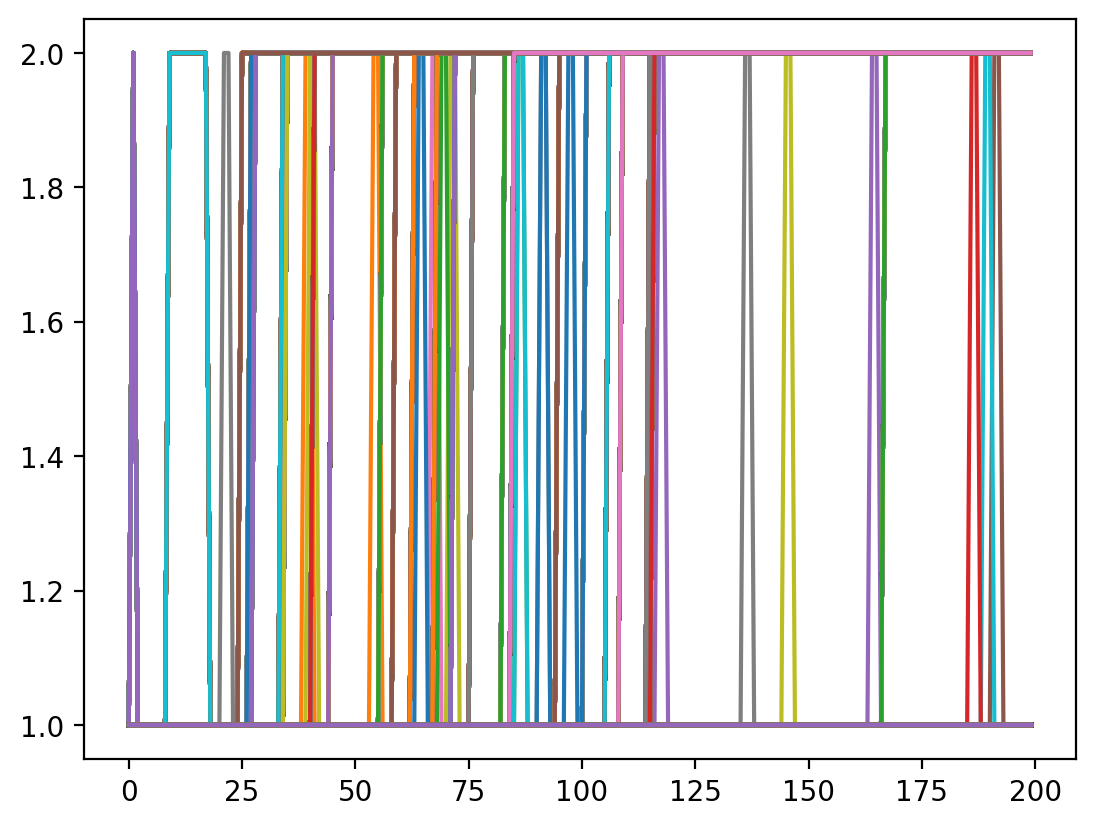

In [54]:
plt.figure(dpi=200)
for key in keys:
    a = results[keys[i]]
    a = a.to("cpu").numpy()
    for i in range(a.shape[0]):
        
        plt.plot(a[i,:])

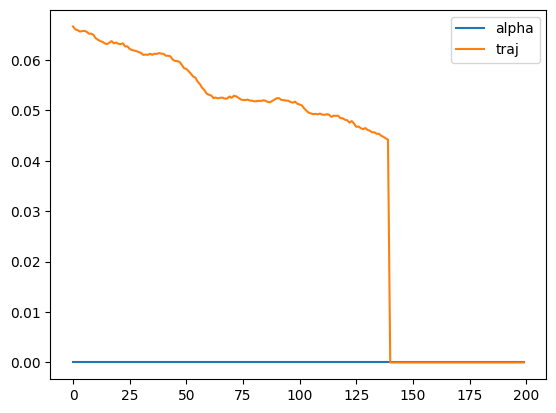

In [ ]:
# plt.plot(a[2,:]/2, label = "s")
plt.plot(b[2,:,1], label = "alpha")
plt.plot(data[2,:,1]/1000, label = "traj")

plt.legend()

In [ ]:
b

array([[[0.17775464, 0.        ],
        [0.17646942, 0.        ],
        [0.17435838, 0.        ],
        ...,
        [0.08771407, 0.        ],
        [0.08072676, 0.        ],
        [0.08483478, 0.        ]],

       [[0.19414604, 0.        ],
        [0.19279702, 0.        ],
        [0.1903362 , 0.        ],
        ...,
        [0.22664657, 0.        ],
        [0.23403688, 0.        ],
        [0.23231827, 0.        ]],

       [[0.15592109, 0.        ],
        [0.15571618, 0.        ],
        [0.15802318, 0.        ],
        ...,
        [0.08649781, 0.        ],
        [0.07796531, 0.        ],
        [0.08302252, 0.        ]],

       ...,

       [[0.22853379, 0.        ],
        [0.22723351, 0.        ],
        [0.22347172, 0.        ],
        ...,
        [0.085337  , 0.        ],
        [0.07579643, 0.        ],
        [0.08135536, 0.        ]],

       [[0.1973317 , 0.        ],
        [0.19581464, 0.        ],
        [0.19274832, 0.        ],
        .

In [ ]:
model(data)

tensor([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]], device='cuda:0', grad_fn=<ReluBackward0>)

In [ ]:
import torch.nn as nn

In [ ]:
relu = nn.ReLU()

In [ ]:
test = torch.randn(10,10,2)

In [ ]:
relu(test)

tensor([[[1.2636, 0.2244],
         [0.0000, 1.1753],
         [1.8726, 0.8369],
         [0.0000, 0.3174],
         [0.0000, 0.0000],
         [0.3831, 0.2239],
         [0.0000, 0.0285],
         [1.2042, 0.7172],
         [0.0000, 0.9031],
         [1.4999, 0.0000]],

        [[0.6770, 0.0000],
         [0.0000, 0.0000],
         [1.7903, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.7431],
         [0.1999, 0.0000],
         [0.5755, 1.1027],
         [0.0366, 0.3679],
         [1.5911, 1.9556],
         [0.0000, 0.0000]],

        [[1.2891, 0.5908],
         [0.6584, 1.2545],
         [0.4158, 0.0000],
         [0.0000, 0.0000],
         [0.4222, 0.8100],
         [0.6134, 0.8446],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.1353, 0.0760],
         [0.0000, 0.0000]],

        [[0.6706, 1.5282],
         [0.0000, 0.3768],
         [0.3606, 0.0000],
         [0.6023, 0.3436],
         [0.0000, 0.7277],
         [0.0000, 1.4987],
         [0.0000, 0.13